# Module 2: Data Analysis

## Sprint 1: Introduction to SQL & Statistics Fundamentals

## Part 5: Analysis of the Mental Health in the Tech Industry

## About this Part

Congrats!
You have reached the last Part of this Sprint.
As the final assignment of this Sprint, you will analyse the Mental Health in the Tech Industry Dataset.
You will have to apply all that you have learned about SQL, Statistics, and Data Analysis to complete this task.
Our expectation is that you'll use your own judgement how to perform the analysis and how to select the most important avenues of exploration.
You'll have to iteratively raise hypotheses and use your data analysis skills to get answers.

P.S. we don't expect this project to be perfect - you will continue to improve your skills and there will be many projects for you to apply your newly gained skills in the future.
For now just use what you have learned and try your best!

## Objectives for this Part

- Practice working with SQLite datasets.
- Practice performing EDA.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries and filtering data using SQL and Pandas.

## Requirements

- Download the data from [Mental Health in the Tech Industry](https://www.kaggle.com/anth7310/mental-health-in-the-tech-industry).
- Load the data using SQLite and Pandas.
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface or did you explored the dataset in depth?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structured? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?

## Sample Correction Questions

During a correction, you may get asked questions that test your understanding of covered topics.

## Correction

During your project correction, you should present your project as if talking to a product manager and senior data analyst working in your team.
You will have to find the right balance between explaining the business side and the technical aspects of your work.
You can assume that both of your colleagues have a strong understanding of and are very interested in the business aspect of your project, so be sure to clearly explain what new insights you've found while analyzing the dataset and which directions look the most promising for further research.
However, you should also spend time explaining the technical aspects of your work, especially the more complex or unconventional choices.

During a correction, you may get asked questions that test your understanding of covered topics.

- What are the main types and subtypes of data?
- What are the main metrics of location? What advantages and disadvantages each of them have?
- What is variability? What are the main metrics of variability? What advantages and disadvantages each of them have?
- What is correlation? How do we use it to analyse data?
- What is a contingency table?


## General Correction Guidelines

For an in-depth explanation about how corrections work at Turing College, please read [this doc](https://turingcollege.atlassian.net/wiki/spaces/DLG/pages/537395951/Peer+expert+reviews+corrections).


# **Exploratory Data Analysis of the Mental Health in the Tech Industry**

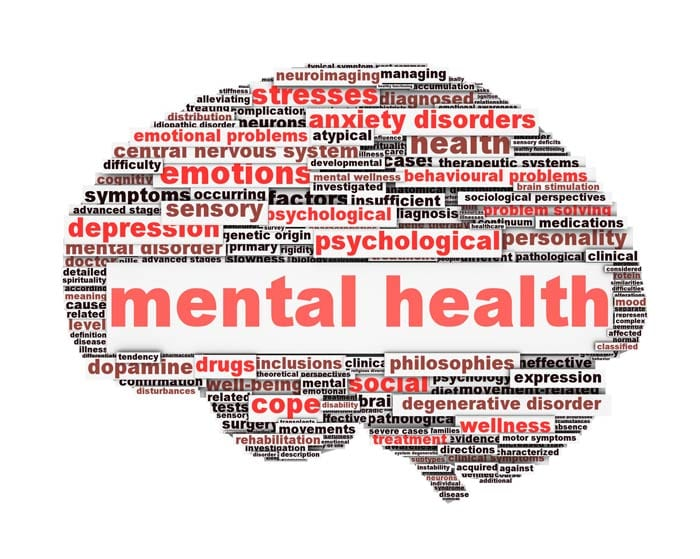

## **Introduction**

The tech industry is known for its fast-paced, demanding work environment. This can lead to high levels of stress, anxiety, and depression among tech workers.

This is a serious problem that needs to be addressed. Mental health conditions can have a significant impact on a person's work, relationships, and overall quality of life. They can also lead to absenteeism, presenteeism, and turnover.

This notebook will explore the prevalence of mental health conditions in the tech industry. We will use a variety of methods to analyze the data, including charts.

The goal of this analysis is to gain a better understanding of the mental health of tech workers and to identify any potential problems or trends. This information can be used to improve the mental health of tech workers and create a more supportive work environment

From the analysis, I can conclude that a lot of employees in the tech industry suffer from mental health disorders, and don't want their employers to know about it. They prefer to carry on with their normal lives as long as it doesn't affect their work.

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns

#Insert path here
dataset = '/content/mental_health.sqlite'

# connect to SQL database
con = sql.connect(dataset) # create connection object to database

# Check contents of the database
tables = con.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(tables.fetchall())



[('Answer',), ('Question',), ('Survey',)]


In [ ]:
# Load the tables into data frames
answer_df = pd.read_sql_query("SELECT * FROM Answer", con)
question_df = pd.read_sql_query("SELECT * FROM Question", con)
survey_df = pd.read_sql_query("SELECT * FROM Survey", con)


## **Data Cleaning**

### **Check for missing values**

In [ ]:
# Execute the SQL query
query = "PRAGMA table_info(Answer);"
result = pd.read_sql_query(query, con)
# Display the result
result

,cid,name,type,notnull,dflt_value,pk
0,0,AnswerText,VARCHAR(10000),0,None,0
1,1,SurveyID,INTEGER,0,None,0
2,2,UserID,INTEGER,0,None,0
3,3,QuestionID,INTEGER,0,None,0


In [ ]:
# Execute the SQL query
query = "PRAGMA table_info(Question);"
result = pd.read_sql_query(query, con)
# Display the result
result

,cid,name,type,notnull,dflt_value,pk
0,0,questiontext,VARCHAR(1000),0,None,0
1,1,questionid,INTEGER,0,None,0


In [ ]:
# Execute the SQL query
query = "PRAGMA table_info(Survey);"
result = pd.read_sql_query(query, con)
# Display the result
result

,cid,name,type,notnull,dflt_value,pk
0,0,SurveyID,INTEGER,1,None,1
1,1,Description,VARCHAR(255),0,None,0


AnswerText column is categorical, while surveyID, UserID, and QuestionID are numerical

In [ ]:
# Check for missing values in each column
query_mc = """
    SELECT
        SUM(CASE WHEN AnswerText IS NULL OR AnswerText = 'None' OR AnswerText = 'NA' THEN 1 ELSE 0 END) AS missing_count_AnswerText,
        SUM(CASE WHEN SurveyID IS NULL OR SurveyID = 'None' OR SurveyID = 'NA' THEN 1 ELSE 0 END) AS missing_count_SurveyID,
        SUM(CASE WHEN UserID IS NULL OR UserID = 'None' OR UserID = 'NA' THEN 1 ELSE 0 END) AS missing_count_UserID,
        SUM(CASE WHEN QuestionID IS NULL OR QuestionID = 'None' OR QuestionID = 'NA' THEN 1 ELSE 0 END) AS missing_count_QuestionID
    FROM Answer;
"""
query_mc_result = pd.read_sql_query(query_mc, con)

# Display the result
print(query_mc_result)


   missing_count_AnswerText  missing_count_SurveyID  missing_count_UserID  \
0                         0                       0                     0   

   missing_count_QuestionID  
0                         0  


In [ ]:
# Check for missing values in each column
query_q = """
    SELECT
        SUM(CASE WHEN questiontext IS NULL OR questiontext = 'None' OR questiontext = 'NA' THEN 1 ELSE 0 END) AS missing_count_questiontext,
        SUM(CASE WHEN questionid IS NULL OR questionid = 'None' OR questionid = 'NA' THEN 1 ELSE 0 END) AS missing_count_questionid
    FROM Question;
"""
query_q_result = pd.read_sql_query(query_q, con)

# Display the result
print(query_q_result)


   missing_count_questiontext  missing_count_questionid
0                           0                         0


In [ ]:
# Check for missing values in each column
query_s = """
    SELECT
        SUM(CASE WHEN SurveyID IS NULL OR SurveyID = 'None' OR SurveyID = 'NA' THEN 1 ELSE 0 END) AS missing_count_SurveyID,
        SUM(CASE WHEN Description IS NULL OR Description = 'None' OR Description = 'NA' THEN 1 ELSE 0 END) AS missing_count_Description
    FROM Survey;
"""
query_s_result = pd.read_sql_query(query_s, con)

# Display the result
print(query_s_result)


   missing_count_SurveyID  missing_count_Description
0                       0                          0


### **Check for duplicates**

In [ ]:
# Check for duplicates
query_duplicates = """
    SELECT AnswerText, SurveyID, UserID, QuestionID, COUNT(*) as count
    FROM Answer
    GROUP BY AnswerText, SurveyID, UserID, QuestionID
    HAVING COUNT(*) > 1;
"""
query_duplicates_result = pd.read_sql_query(query_duplicates, con)

# Display the result
print(query_duplicates_result)


Empty DataFrame
Columns: [AnswerText, SurveyID, UserID, QuestionID, count]
Index: []


In [ ]:
# Check for duplicates
query_q_duplicates = """
    SELECT questiontext, questionid, COUNT(*) as count
    FROM Question
    GROUP BY questiontext, questionid
    HAVING COUNT(*) > 1;
"""
query_q_duplicates_result = pd.read_sql_query(query_q_duplicates, con)

# Display the result
print(query_q_duplicates_result)


Empty DataFrame
Columns: [questiontext, questionid, count]
Index: []


In [ ]:
# Check for duplicates
query_s_duplicates = """
    SELECT SurveyID, Description, COUNT(*) as count
    FROM Survey
    GROUP BY SurveyID, Description
    HAVING COUNT(*) > 1;
"""
query_s_duplicates_result = pd.read_sql_query(query_s_duplicates, con)

# Display the result
print(query_s_duplicates_result)


Empty DataFrame
Columns: [SurveyID, Description, count]
Index: []


## **Exploratory Data Analysis**

Now that we have loaded the tables into data frames, we can perform EDA.

In [ ]:
query_a_s = """
SELECT
  COUNT(*) AS total_rows,
  MIN(SurveyID) AS min_survey_id,
  MAX(SurveyID) AS max_survey_id,
  MIN(UserID) AS min_user_id,
  MAX(UserID) AS max_user_id,
  MIN(QuestionID) AS min_question_id,
  MAX(QuestionID) AS max_question_id,
  MIN(AnswerText) AS min_answer_text,
  MAX(AnswerText) AS max_answer_text
FROM
  Answer;
"""
summary_a_s = pd.read_sql_query(query_a_s, con)
summary_a_s

,total_rows,min_survey_id,max_survey_id,min_user_id,max_user_id,min_question_id,max_question_id,min_answer_text,max_answer_text
0,236893,2014,2019,1,4218,1,118,\n,¯\(°_o)/¯


In [ ]:
query_q_s = """
SELECT
  COUNT(*) AS total_rows,
  MIN(questiontext) AS min_questiontext,
  MAX(questiontext) AS max_questiontext,
  MIN(questionid) AS min_questionid,
  MAX(questionid) AS max_questionid
FROM
  Question;
"""
summary_q_s = pd.read_sql_query(query_q_s, con)
summary_q_s

,total_rows,min_questiontext,max_questiontext,min_questionid,max_questionid
0,105,Any additional notes or comments,Would you have felt more comfortable talking t...,1,118


In [ ]:
query_s_s = """
SELECT
  COUNT(*) AS total_rows,
  MIN(SurveyID) AS min_surveyid,
  MAX(SurveyID) AS max_surveyid,
  MIN(Description) AS min_description,
  MAX(Description) AS max_description
FROM
  Survey;
"""
summary_s_s = pd.read_sql_query(query_s_s, con)
summary_s_s

,total_rows,min_surveyid,max_surveyid,min_description,max_description
0,5,2014,2019,mental health survey for 2014,mental health survey for 2019


### **Summary**

Answer table has 236898 rows and 4 features

Question table has 105 rows and 2 features

Survey table has 5 rows and 2 features

### **Analysis on answered questions**

In [ ]:
for index, row in question_df.iterrows():
    print(index, row['questiontext'])

0 What is your age?
1 What is your gender?
2 What country do you live in?
3 If you live in the United States, which state or territory do you live in?
4 Are you self-employed?
5 Do you have a family history of mental illness?
6 Have you ever sought treatment for a mental health disorder from a mental health professional?
7 How many employees does your company or organization have?
8 Is your employer primarily a tech company/organization?
9 Does your employer provide mental health benefits as part of healthcare coverage?
10 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
11 Would you bring up a mental health issue with a potential employer in an interview?
12 Is your primary role within your company related to tech/IT?
13 Do you know the options for mental health care available under your employer-provided health coverage?
14 Has your employer ever formally discussed mental health (for example

## **Putting the required sql data into a table for analysis**

In [ ]:

# SQL query to retrieve the matching question and answer texts
query = '''
SELECT q.QuestionText, a.AnswerText
FROM Answer a
JOIN Question q ON a.QuestionID = q.QuestionID
'''

# Execute the query and fetch the results into a DataFrame
df = pd.read_sql_query(query, con)

# Display the DataFrame
df


,questiontext,AnswerText
0,What is your age?,37
1,What is your age?,44
2,What is your age?,32
3,What is your age?,31
4,What is your age?,31
...,...,...
236893,Which of the following best describes your wor...,Other
236894,Which of the following best describes your wor...,Support
236895,Which of the following best describes your wor...,Back-end Developer
236896,Which of the following best describes your wor...,DevOps/SysAdmin


## **Demographics Analysis**

### **1. What is your age?**

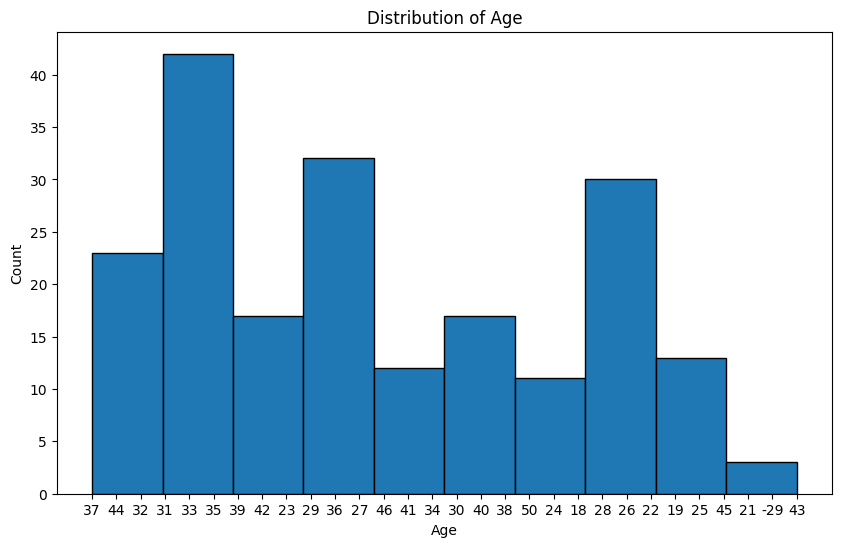

In [ ]:
import matplotlib.pyplot as plt

# Plot the age data
plt.figure(figsize=(10, 6))
plt.hist(df['AnswerText'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()


### **Summary**

More than 40 people fall within the age group of 31 - 39

### **2. What is your gender?**

<ipython-input-69-1e83ce1645c7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_df.loc[~gender_df['AnswerText'].isin(['Male', 'Female']), 'AnswerText'] = 'Not clear'


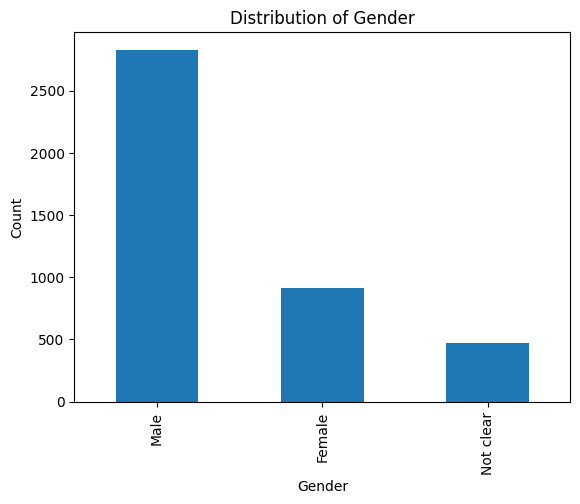

In [ ]:
# Filter the DataFrame for the specific question
gender_df = df[df['questiontext'] == 'What is your gender?']

# Replace non-male and non-female genders with a different category name
gender_df.loc[~gender_df['AnswerText'].isin(['Male', 'Female']), 'AnswerText'] = 'Not clear'

# Count the number of each answer
gender_counts = gender_df['AnswerText'].value_counts()

# Plot the gender distribution as a bar chart
gender_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()


### **Summary**

A lot of males took the survey than females

### **3. What is your race?**

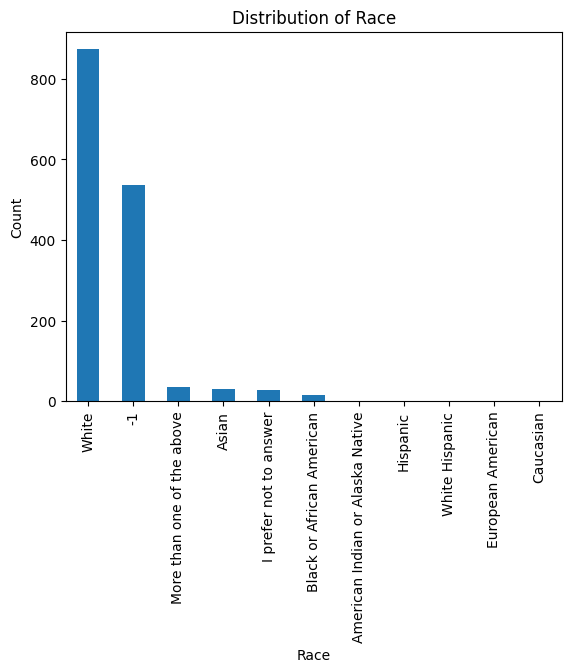

In [ ]:
# Filter the DataFrame for the specific question
race_df = df[df['questiontext'] == 'What is your race?']

# Count the number of each race
race_counts = race_df['AnswerText'].value_counts()

# Plot the race distribution as a bar chart
race_counts.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Race')
plt.show()


### **Summary**

The white race is more in population when compared with the other races

## **Employment and Organization Analysis**

### **1. Are you self-employed?**

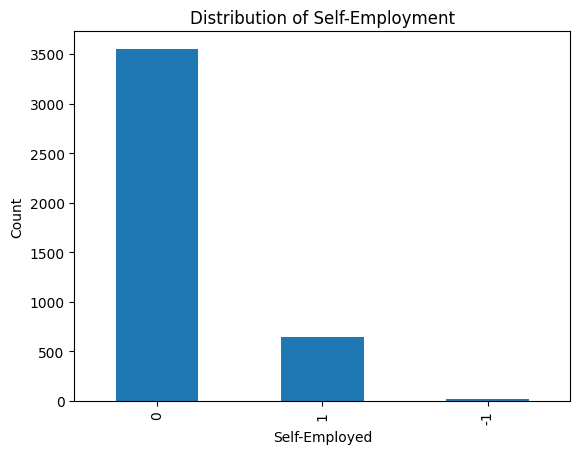

In [ ]:
# Filter the DataFrame for the specific question
self_employed_df = df[df['questiontext'] == 'Are you self-employed?']

# Count the number of each response
self_employed_counts = self_employed_df['AnswerText'].value_counts()

# Plot the self-employment distribution as a bar chart
self_employed_counts.plot(kind='bar')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.title('Distribution of Self-Employment')
plt.show()


### **Summary**

Few people said there were self employed, most people are not self employed

### **2. How many employees does your company or organization have?**

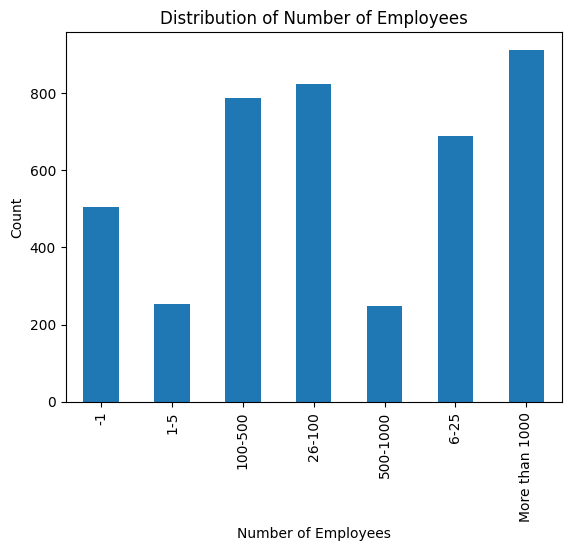

In [ ]:
# Filter the DataFrame for the specific question
employees_df = df[df['questiontext'] == 'How many employees does your company or organization have?']

# Count the number of each response
employees_counts = employees_df['AnswerText'].value_counts()

# Sort the counts by the number of employees in ascending order
employees_counts = employees_counts.sort_index()

# Plot the employee distribution as a bar chart
employees_counts.plot(kind='bar')
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.title('Distribution of Number of Employees')
plt.show()


### **Summary**

Over 800 people said their organization had more than 1000 employees

### **3. Is your employer primarily a tech company/organization?**

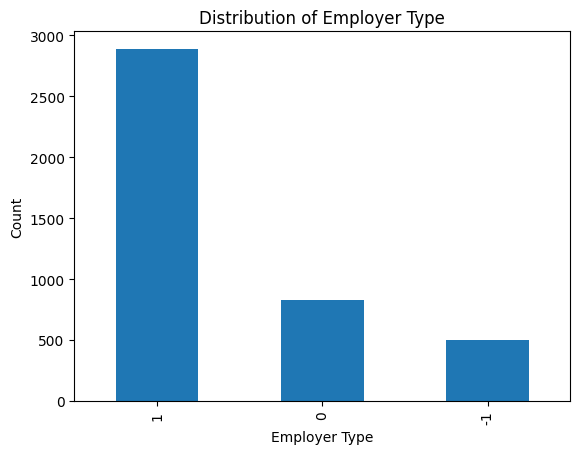

In [ ]:
# Filter the DataFrame for the specific question
tech_company_df = df[df['questiontext'] == 'Is your employer primarily a tech company/organization?']

# Count the number of each response
tech_company_counts = tech_company_df['AnswerText'].value_counts()

# Plot the distribution of tech and non-tech companies as a bar chart
tech_company_counts.plot(kind='bar')
plt.xlabel('Employer Type')
plt.ylabel('Count')
plt.title('Distribution of Employer Type')
plt.show()


### **Summary**

Most people said their employers are tech companies, few people belonged to an organization

### **4. What country do you work in?**

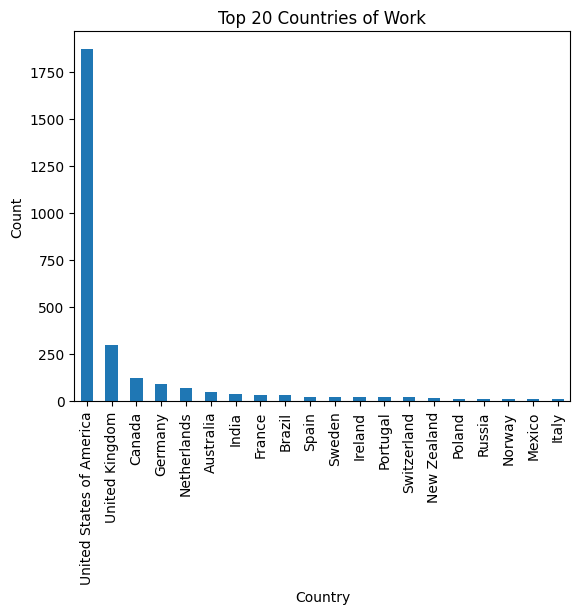

In [ ]:
# Filter the DataFrame for the specific question
country_work_df = df[df['questiontext'] == 'What country do you work in?']

# Count the number of respondents in each country
country_work_counts = country_work_df['AnswerText'].value_counts().nlargest(20)

# Plot the distribution of the top 10 countries as a bar chart
country_work_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 20 Countries of Work')
plt.show()


### **Summary**

Most employees work in the United States of America, followed by the United Kingdom

## **Mental Health History and Treatment Analysis**

### **1. Do you have a family history of mental illness?**

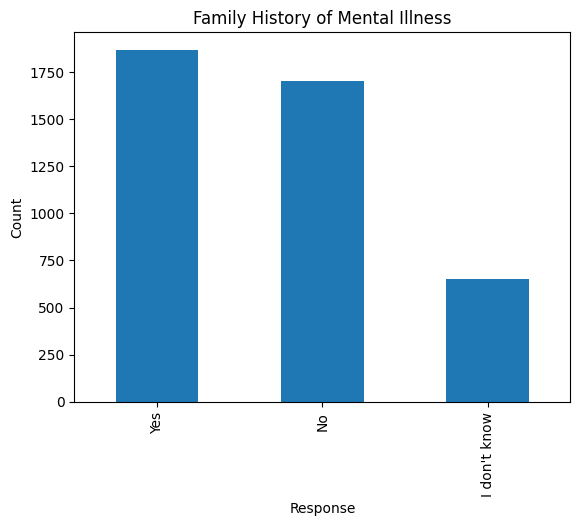

In [ ]:
# Filter the DataFrame for the specific question
family_history_df = df[df['questiontext'] == 'Do you have a family history of mental illness?']

# Count the number of each response
family_history_counts = family_history_df['AnswerText'].value_counts()

# Plot the distribution as a bar chart
family_history_counts.plot(kind='bar')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Family History of Mental Illness')
plt.show()


### **Summary**

Most people said they have a family history of mental illness

### **2. Have you ever sought treatment for a mental health disorder from a mental health professional?**

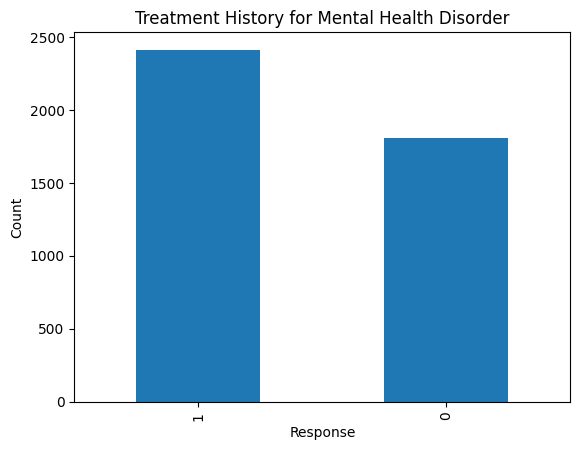

In [ ]:
# Filter the DataFrame for the specific question
treatment_history_df = df[df['questiontext'] == 'Have you ever sought treatment for a mental health disorder from a mental health professional?']

# Count the number of each response
treatment_history_counts = treatment_history_df['AnswerText'].value_counts()

# Plot the distribution as a bar chart
treatment_history_counts.plot(kind='bar')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Treatment History for Mental Health Disorder')
plt.show()


### **Summary**

Most people said they soughted treatment of mental health disorder from a health professional

### **3. Have you had a mental health disorder in the past?**

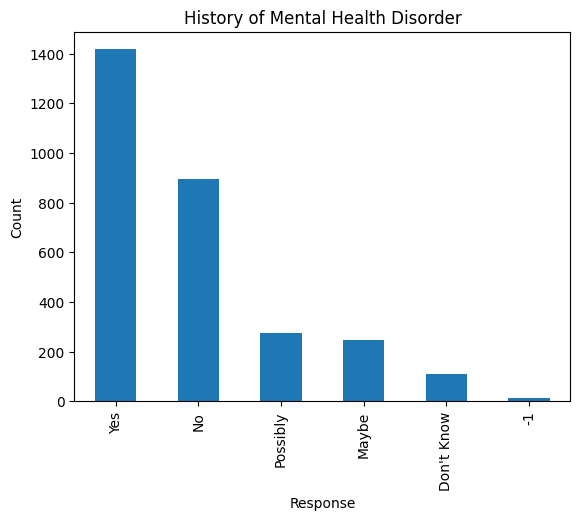

In [ ]:
# Filter the DataFrame for the specific question
past_disorder_df = df[df['questiontext'] == 'Have you had a mental health disorder in the past?']

# Count the number of each response
past_disorder_counts = past_disorder_df['AnswerText'].value_counts()

# Plot the distribution as a bar chart
past_disorder_counts.plot(kind='bar')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('History of Mental Health Disorder')
plt.show()


### **Summary**

Most people have had a mental health disorder in the past

### **4. Do you currently have a mental health disorder?**

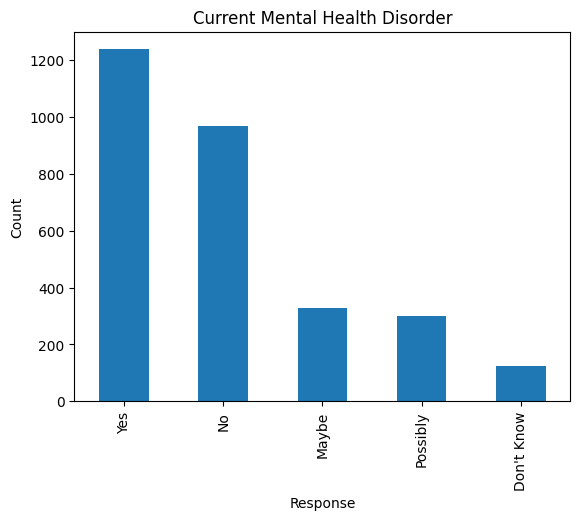

In [ ]:
# Filter the DataFrame for the specific question
current_disorder_df = df[df['questiontext'] == 'Do you currently have a mental health disorder?']

# Count the number of each response
current_disorder_counts = current_disorder_df['AnswerText'].value_counts()

# Plot the distribution as a bar chart
current_disorder_counts.plot(kind='bar')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Current Mental Health Disorder')
plt.show()


### **Summary**

Most people said they currently have a mental health disorder

### **5. If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?**

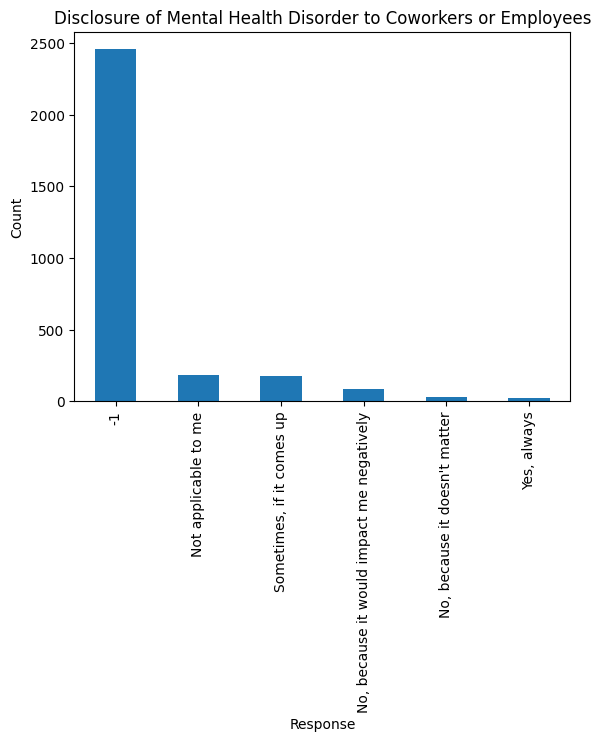

In [ ]:
# Filter the DataFrame for the specific question
reveal_disorder_df = df[df['questiontext'] == 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?']

# Count the number of each response
reveal_disorder_counts = reveal_disorder_df['AnswerText'].value_counts()

# Plot the distribution as a bar chart
reveal_disorder_counts.plot(kind='bar')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Disclosure of Mental Health Disorder to Coworkers or Employees')
plt.show()


### **Summary**

Most people do not like telling other employees or coworkers their mental health condition after beem diagnosed for a mental health disorder

## **Conclusion**

From the analysis, I can conclude that a lot of male employees in the tech industry mostly belong to the white race, and fall within the age group 31 - 39 years old, and work for the big tech companies in the USA, suffer from mental health disorders. Also, they don't want their employers and coworkers to know about their situation, and they prefer to carry on with their normal lives as long as it doesn't affect their work.

## **Suggestions**
1. More visualizations.
2. Applying machine learning algorithms to identify patterns or predict outcomes based on the available data.